In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


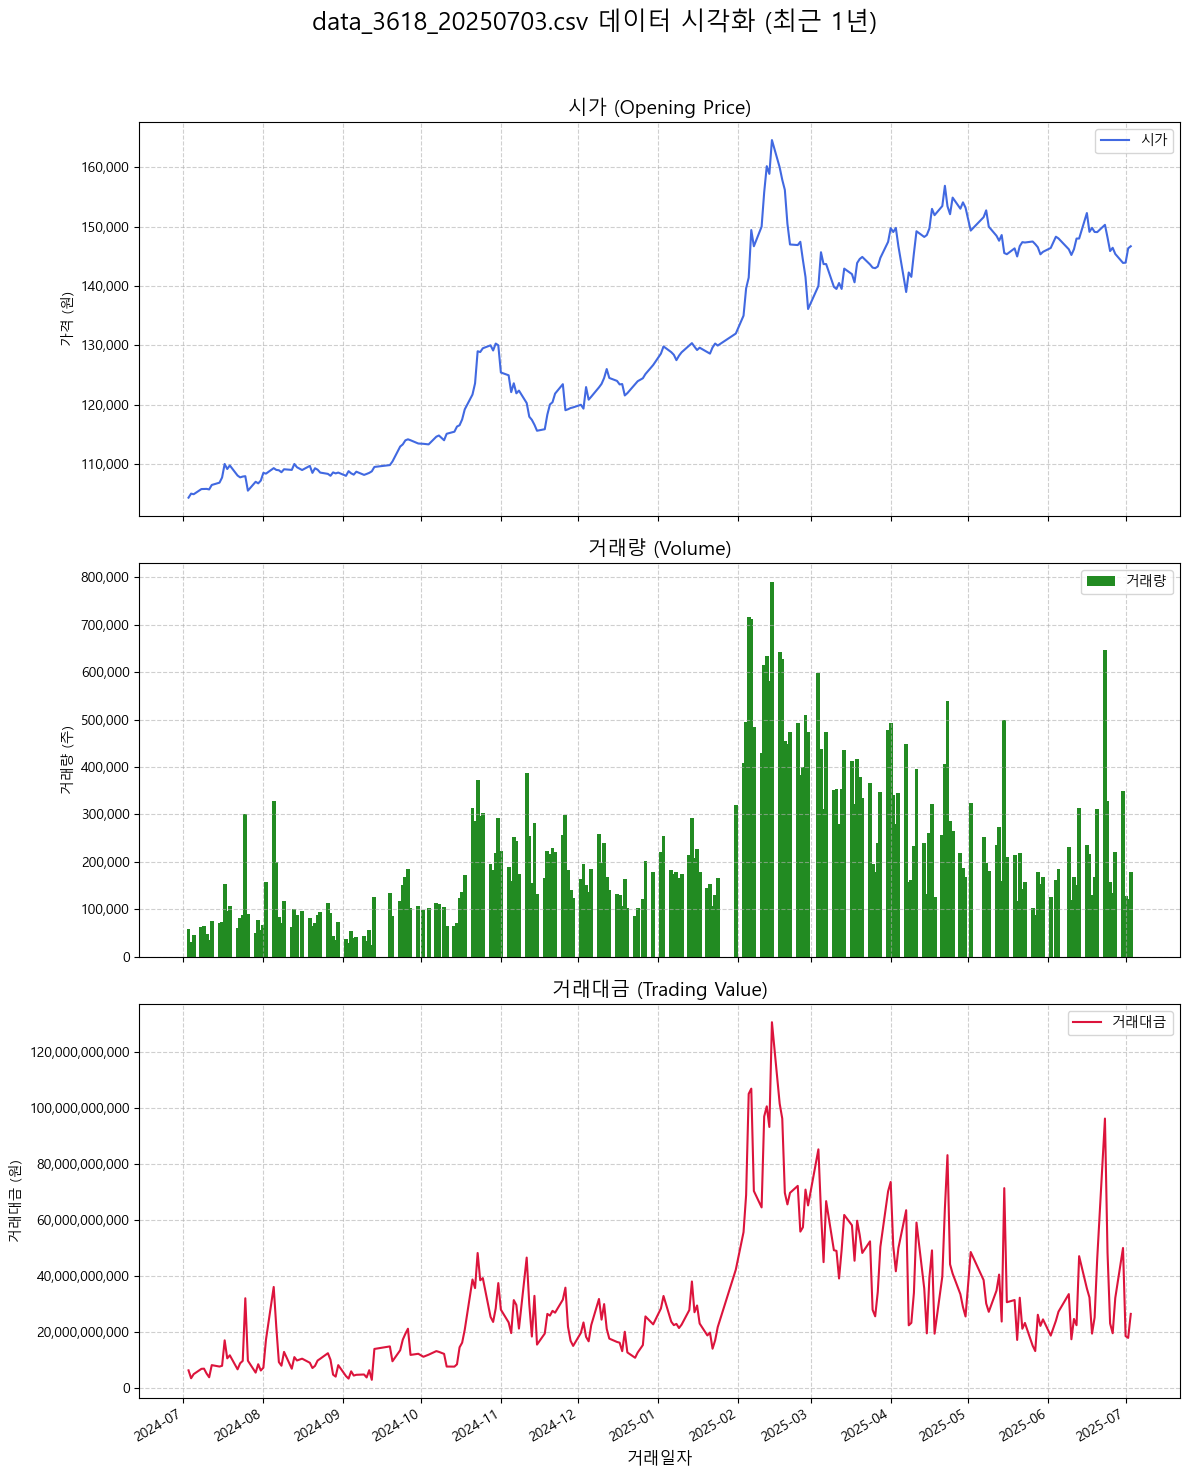

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from datetime import datetime

# --- 설정 (Configuration) ---

# 1. 시각화할 CSV 파일 경로를 지정하세요.
# 코드를 실행하는 위치와 같은 폴더에 파일이 있다면 파일명만 적어도 됩니다.
file_path = 'data_3618_20250703.csv' # <-- 여기에 파일명을 입력하세요.

# 2. 한글 폰트 설정 (Windows: 'Malgun Gothic', macOS: 'AppleGothic')
# 사용자 환경에 맞는 폰트 이름을 지정하세요.
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# --- 데이터 불러오기 및 전처리 ---
try:
    # CSV 파일을 데이터프레임으로 읽어옵니다.
    df = pd.read_csv(file_path, encoding="cp949")
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다.")
    print("파일 경로와 파일명이 올바른지 다시 확인해주세요.")
    exit()

# '거래일자' 컬럼을 datetime 형식으로 변환합니다.
df['거래일자'] = pd.to_datetime(df['일자'], format='%Y/%m/%d')

# 숫자 데이터에 포함된 쉼표(,)를 제거하고 숫자형(float)으로 변환합니다.
numeric_cols = ['시가', '거래량', '거래대금']
for col in numeric_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)

# 날짜순으로 데이터를 정렬합니다.
df = df.sort_values('거래일자')

# 가장 최근 날짜로부터 1년 전의 데이터를 필터링합니다.
latest_date = df['거래일자'].max()
one_year_ago = latest_date - pd.DateOffset(years=1)
df_1year = df[df['거래일자'] >= one_year_ago]


# --- 그래프 시각화 ---

# 3개의 그래프를 담을 전체 그림(figure)과 축(axes)을 생성합니다.
fig, axes = plt.subplots(3, 1, figsize=(12, 16), sharex=True)
fig.suptitle(f'{file_path} 데이터 시각화 (최근 1년)', fontsize=18, y=0.95)

# 1. 시가 (Opening Price) 그래프
axes[0].plot(df_1year['거래일자'], df_1year['시가'], color='royalblue', label='시가')
axes[0].set_title('시가 (Opening Price)', fontsize=14)
axes[0].set_ylabel('가격 (원)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[0].legend()

# 2. 거래량 (Volume) 그래프
axes[1].bar(df_1year['거래일자'], df_1year['거래량'], color='forestgreen', width=1.5, label='거래량')
axes[1].set_title('거래량 (Volume)', fontsize=14)
axes[1].set_ylabel('거래량 (주)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[1].legend()

# 3. 거래대금 (Trading Value) 그래프
axes[2].plot(df_1year['거래일자'], df_1year['거래대금'], color='crimson', label='거래대금')
axes[2].set_title('거래대금 (Trading Value)', fontsize=14)
axes[2].set_ylabel('거래대금 (원)')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[2].legend()


# --- X축 서식 설정 ---

axes[2].set_xlabel('거래일자', fontsize=12)
# X축 눈금을 월 단위로 표시합니다.
axes[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# X축 눈금 레이블을 '년-월' 형식으로 지정합니다.
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# X축 레이블이 겹치지 않도록 30도 회전합니다.
plt.setp(axes[2].get_xticklabels(), rotation=30, ha='right')

# 그래프 레이아웃을 조정하고 화면에 출력합니다.
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()